# Importar bibliotecas

Começamos importando todas as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados

Usaremos um conjunto de dados do `SUS` para este experimento.

In [2]:
df = pd.read_csv('data/DRC_DATA_SUS.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673342 entries, 0 to 673341
Data columns (total 77 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   N_AIH                  673342 non-null  int64  
 1   ANO_CMPT               673342 non-null  int64  
 2   MES_CMPT               673342 non-null  int64  
 3   TP_CBO                 673342 non-null  object 
 4   TP_CNAE                199 non-null     object 
 5   TP_ESPEC               673342 non-null  object 
 6   TP_NACIONAL            673342 non-null  object 
 7   faixa_etaria           437128 non-null  object 
 8   dt_inter               673342 non-null  object 
 9   dt_saida               673342 non-null  object 
 10  ano_internacao         673342 non-null  int64  
 11  ano_saida              673342 non-null  int64  
 12  dia_semana_internacao  673342 non-null  object 
 13  dia_semana_saida       673342 non-null  object 
 14  DS_RACACOR             673342 non-nu

In [3]:
df.head()

,N_AIH,ANO_CMPT,MES_CMPT,TP_CBO,TP_CNAE,TP_ESPEC,TP_NACIONAL,faixa_etaria,dt_inter,dt_saida,...,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_UTI,VAL_TOT,US_TOT
0,1215100025304,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,30-34a,2014-12-06,2015-01-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.37,419.98
1,1215100029650,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,35-39a,2015-01-13,2015-01-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.77,28.14
2,1215100029935,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,NaN,2015-01-19,2015-01-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,631.39,219.99
3,1215100030485,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,NaN,2015-01-13,2015-01-28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,710.07,247.41
4,1215100032487,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,45-49a,2015-01-26,2015-01-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,487.60,169.89


# Exploração De Dados

## Explicação das colunas

### Com base na análise do conjunto de dados, temos os seguintes detalhes:

- **N_AIH:** Número da Autorização de Admissão Hospitalar (AIH).
- As admissões hospitalares podem ter números de AIH duplicados.
- **ANO_CMPT:** Ano de processamento da AIH, no formato aaaa. [Intervalo: 2015–2022].
- **MES_CMPT:** Mês de processamento da AIH, no formato mm. [Intervalo: 1–12].
- **TP_CBO:** Relacionado à ocupação.
- Muitos valores estão faltando: "Não Informado" 673.143 ocorrências.
- **TP_ESPEC:** Especialidade do leito.
- **TP_NACIONAL:** Nacionalidade do paciente.
- **Faixa Etária:** Faixa etária.
- **Data de Internação (dt_inter):** Data de admissão hospitalar.
- **Dados de Saída (dt_saida):** Data da alta.
- **Classificação COR IBGE (DS_RACACOR):** Classificação de raça/cor da pele do IBGE.
- **Sexo de Nascimento (DS_SEXO):** Sexo ao nascer.
- **Descrição do Procedimento Realizado (DS_PROC_REA):** Descrição do procedimento realizado.
- **Descrição da Complexidade (DS_COMPLEX):** Descrição da complexidade do procedimento.
- **CID da Morte (CID_MORTE):** Código CID relacionado ao óbito.
 - Existe apenas um valor, o que o torna inútil.
- **CID da Causa (CID_ASSO):** Código CID da causa associada.
 - Existe apenas um valor, o que o torna inútil.
- **Indica Óbito (MORTE):** Indica se o paciente faleceu.
- **Dias de Permanência (DIAS_PERM):** Tempo de permanência (em dias).
- **Motivo de Saída/Permanência (DS_COBRANCA):** Motivo da alta ou permanência continuada.
- **Diagnóstico Principal (DS_DIAG_PRINC):** Diagnóstico primário.
- **VAL_SP_GES, VAL_SH_GES, VAL_SP_FED, VAL_SH_FED:** Estão incluídos em **VAL_TOTAL** (custo total).
- **VAL_UCI para VAL_TOT:** Métricas relacionadas a custos.

### Considerações:

- **N_AIH:** Pode ser útil para verificar readmissões de pacientes e calcular o custo total por paciente.
- **TP_ESPEC:** Pode ser útil, mas é necessária uma análise mais aprofundada.
- **Faixa Etária:** Muito útil, embora nem todos os dados no conjunto de dados tenham essa métrica.
- **dt_inter, dt_saida, DIAS_PERM:** Útil para analisar a duração da internação hospitalar, importante para o cálculo de custos.
- **DS_RACACOR:** Potencialmente útil para adicionar fatores de variabilidade genética ao modelo.
- **DS_SEXO:** Também potencialmente útil para considerações de variabilidade genética.
- **DS_PROC_REA:** Parece ser útil, mas tenha cuidado com procedimentos que tenham dados esparsos.
- **DS_COMPLEX:** Parece valioso para análise.
- **MORTE:** Extremamente útil como uma medida de eficácia.
- **DS_COBRANCA:** Também extremamente útil como uma medida de eficácia.
- **DS_DIAG_PRINC:** Muito útil para categorizar o diagnóstico primário.
- **VAL_UCI para VAL_TOT:** Métricas de custo críticas para a análise.

## Code

### N_AIH: Número da Autorização de Admissão Hospitalar (AIH)

In [4]:
# Pode existir internações hospitalares com números AIH (AUTORIZAÇÃO DE INTERNAÇÃO HOSPITALAR) IGUAIS
df.N_AIH.unique().shape[0], df.N_AIH.shape[0] 

(673296, 673342)

### TP_ESPEC: Especialidade do leito

In [5]:
df.TP_ESPEC.value_counts()

TP_ESPEC
ClÃ­nico                                        611292
CirÃºrgico                                       48353
PediÃ¡tricos                                     12312
Leito Dia / IntercorrÃªncia PÃ³s-Transplante      1117
Leito Dia / CirÃºrgicos                            120
CrÃ´nicos                                           80
Leito Dia / Geriatria                               35
ObstÃ©tricos                                        26
Psiquiatria                                          6
Pneumologia SanitÃ¡ria (Tisiologia)                  1
Name: count, dtype: int64

### Faixa Etária

In [6]:
df.faixa_etaria.value_counts()

faixa_etaria
60-64a    80367
55-59a    75627
50-54a    65582
45-49a    52432
40-44a    40724
35-39a    33603
30-34a    26570
25-29a    20786
20-24a    15570
15-19a     9307
10-14a     6708
5-9a       4979
1-4a       3724
<1a        1149
Name: count, dtype: int64

### DIAS_PERM

<Axes: >

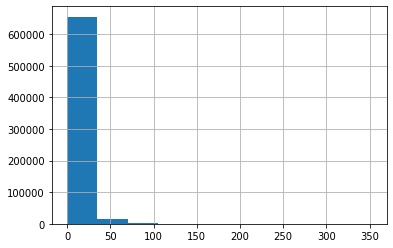

In [7]:
df.DIAS_PERM.hist()

### Classificação COR IBGE (DS_RACACOR)

In [8]:
df.DS_RACACOR.value_counts()

DS_RACACOR
Parda             239483
Branca            229286
Sem Informação    146381
Preta              46656
Amarela            10668
Indígena             868
Name: count, dtype: int64

### Sexo de Nascimento (DS_SEXO)

In [9]:
df.DS_SEXO.value_counts()

DS_SEXO
Masculino    380657
Feminino     292685
Name: count, dtype: int64

### Descrição do Procedimento Realizado (DS_PROC_REA)

No estudo serão considerados os procedimentos relacionados ao estágio 5 da DCT.

Estágio 5: Falência Renal (Doença Renal Terminal)
Objetivo Principal: Realizar terapia de substituição renal (diálise ou transplante) e tratar complicações associadas.

- HEMODIÁLISE
    - TRATAMENTO DE INSUFICIÊNCIA RENAL AGUDA
    - TRATAMENTO DE INTERCORRÊNCIA EM PACIENTE RENAL CRÔNICO SOB TRATAMENTO DIALÍTICO
- DIÁLISE PERITONEAL
- TRANSPLANTE DE RIM
    - TRANSPLANTE DE RIM (ÓRGÃO DE DOADOR VIVO)
    - TRANSPLANTE DE RIM (ÓRGÃO DE DOADOR FALECIDO)
    - TRATAMENTO DE INTERCORRÊNCIA PÓS-TRANSPLANTE DE ÓRGÃOS
- IMPLANTAÇÃO DE CATETER DE LONGA PERMANÊNCIA SEMI OU TOTALMENTE IMPLANTÁVEL
- NEFRECTOMIA TOTAL
- NEFROSTOMIA

Categorização com LLM

https://chatgpt.com/share/66e97384-b66c-8006-abda-89a5613e6399

In [10]:
df.DS_PROC_REA.value_counts()

DS_PROC_REA
TRATAMENTO DA DOENCA RENAL CRONICA - DRC                                                                448446
TRATAMENTO DE INTERCORRENCIA EM PACIENTE RENAL CRONICO SOB TRATAMENTO DIALITICO ( POR DIA)              126249
TRANSPLANTE DE RIM (ORGAO DE DOADOR FALECIDO)                                                            30567
TRATAMENTO DE INTERCORRENCIA POS-TRANSPLANTE DE ORGAOS / CELULAS-TRONCO HEMATOPOETICAS                   16907
DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA                                               16167
                                                                                                         ...  
TRATAMENTO CIRURGICO DE FRATURA DO PLANALTO TIBIAL                                                           1
RESSECCAO EM CUNHA, TUMORECTOMIA / BIOPSIA DE PULMAO A CEU ABERTO                                            1
PIELOSTOMIA                                                                                         

### Descrição da Complexidade (DS_COMPLEX): Descrição da complexidade do procedimento.

In [11]:
df.DS_COMPLEX.value_counts()

DS_COMPLEX
Média complexidade    615879
Alta complexidade      57463
Name: count, dtype: int64

### Indica Óbito (MORTE): Indica se o paciente faleceu.

In [12]:
df.MORTE.value_counts()

MORTE
0    602494
1     70848
Name: count, dtype: int64

### DS_COBRANCA: Também extremamente útil como uma medida de eficácia.

In [13]:
df.DS_COBRANCA.value_counts()

DS_COBRANCA
Alta melhorado                                        427082
Óbito com DO fornecida pelo médico assistente          68086
Alta com previsão de retorno p/acomp do paciente       61923
Transferência para outro estabelecimento               30024
Encerramento administrativo                            21966
Permanência por mudança de procedimento                13481
Permanência por intercorrência                         11117
Permanência por características próprias da doença     10306
Alta por outros motivos                                 5142
Alta por evasão                                         4754
Alta a pedido                                           4734
Alta curado                                             4161
Permanência por outros motivos                          3660
Permanência por reoperação                              3386
Óbito com DO fornecida pelo SVO                         1860
Óbito com DO fornecida pelo IML                          902
Permanência 

### DS_DIAG_PRINC: Muito útil para categorizar o diagnóstico primário.

In [14]:
df.DS_DIAG_PRINC.value_counts()

DS_DIAG_PRINC
N18.9 Insuf renal cronica NE          402208
N18.0 Doenc renal em estadio final    182931
N18.8 Outr insuf renal cronica         85301
N18   Insuf renal cronica               2902
Name: count, dtype: int64

### VAL_TOT: Métrica de custo críticas para a análise.

<Axes: >

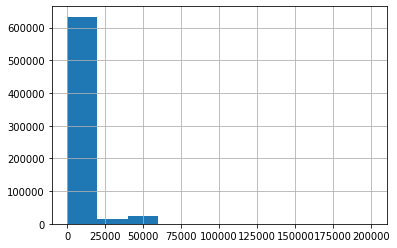

In [15]:
df.VAL_TOT.hist()

# Pré-processamento de dados

Nesta etapa, pré-processamos o conjunto de dados. Isso inclui:
- Manipulação de valores ausentes (se houver)
- Codificação de variáveis categóricas (se aplicável)
- Escala ou normalização dos recursos (opcional)
- Definição de `X` (features) e `y` (variável de target)

## Procedimentos

Seleciona os procedimentos relacionados com o estágio 5 da DCT.

In [16]:
# Your list of substrings to search for
stage5treatments = ['DRC',
                    'DIALITICO',
                    'CATETER',
                    'TRANSPLANTE']

# Create a regex pattern that matches any of the substrings
pattern = '|'.join(stage5treatments)

# Use str.contains to filter the DataFrame
mask = df['DS_PROC_REA'].str.contains(pattern, case=False, na=False)

# Get the value counts of the matching treatments
df.loc[mask, 'DS_PROC_REA'].value_counts()

DS_PROC_REA
TRATAMENTO DA DOENCA RENAL CRONICA - DRC                                                                448446
TRATAMENTO DE INTERCORRENCIA EM PACIENTE RENAL CRONICO SOB TRATAMENTO DIALITICO ( POR DIA)              126249
TRANSPLANTE DE RIM (ORGAO DE DOADOR FALECIDO)                                                            30567
TRATAMENTO DE INTERCORRENCIA POS-TRANSPLANTE DE ORGAOS / CELULAS-TRONCO HEMATOPOETICAS                   16907
TRANSPLANTE DE RIM (ORGAO DE DOADOR VIVO)                                                                 5278
TRATAMENTO DE INTERCORRENCIA POS-TRANSPLANTE DE RIM - POS TRANSPLANTE CRITICO                              731
IMPLANTACAO DE CATETER DE LONGA PERMANENCIA SEMI OU TOTALMENTE IMPLANTAVEL (PROCEDIMENTO PRINCIPAL         595
INSTALACAO ENDOSCOPICA DE CATETER DUPLO J                                                                  247
RETIRADA DE CATETER DE LONGA PERMANENCIA SEMI OU TOTALMENTE IMPLANTAVEL                             

In [17]:
# Define a function to map the values in 'DS_PROC_REA' to one of the four categories
def categorize_treatment(value):
    value = value.upper()  # Convert to uppercase for case-insensitive matching
    if 'DRC' in value:
        return 'DRC'
    elif 'DIALITICO' in value:
        return 'DIALITICO'
    elif 'CATETER' in value:
        return 'CATETER'
    elif 'TRANSPLANTE' in value:
        return 'TRANSPLANTE'
    else:
        return 'OTHER'  # You can choose to label unmatched values as 'Other'

# Apply the function to create a new column with the categorized values
df['Treatment_Category'] = df['DS_PROC_REA'].apply(categorize_treatment)

# View the resulting value counts for the new category column
df['Treatment_Category'].value_counts()

Treatment_Category
DRC            448446
DIALITICO      126249
TRANSPLANTE     53687
OTHER           43903
CATETER          1057
Name: count, dtype: int64

In [18]:
df = df[df['Treatment_Category'] != 'OTHER']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629439 entries, 0 to 673341
Data columns (total 78 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   N_AIH                  629439 non-null  int64  
 1   ANO_CMPT               629439 non-null  int64  
 2   MES_CMPT               629439 non-null  int64  
 3   TP_CBO                 629439 non-null  object 
 4   TP_CNAE                178 non-null     object 
 5   TP_ESPEC               629439 non-null  object 
 6   TP_NACIONAL            629439 non-null  object 
 7   faixa_etaria           407105 non-null  object 
 8   dt_inter               629439 non-null  object 
 9   dt_saida               629439 non-null  object 
 10  ano_internacao         629439 non-null  int64  
 11  ano_saida              629439 non-null  int64  
 12  dia_semana_internacao  629439 non-null  object 
 13  dia_semana_saida       629439 non-null  object 
 14  DS_RACACOR             629439 non-null  o

## Custo

Somente as colunas VAL_UCI, VAL_SH, VAL_SP, VAL_UTI e VAL_TOT possuem valores, as quais foram usadas para o cálculo

Pelo histograma, há uma grande dispersão de valores, sendo necessário tratar os outliners **VERIFICAR POSTERIORMENTE SE EFICAZ**

In [19]:
val_columns = [
    "VAL_UCI", "VAL_SH", "VAL_SP", "VAL_SADT", "VAL_RN", "VAL_ACOMP", 
    "VAL_ORTP", "VAL_SANGUE", "VAL_SADTSR", "VAL_TRANSP", 
    "VAL_OBSANG", "VAL_PED1AC", "VAL_UTI", "VAL_TOT"
]

# Create boxplots for each value column
for column in val_columns:
    print(df[column].min(), df[column].max())

0.0 12960.0
0.0 134769.32
5.34 21395.39
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 148797.9
20.74 156164.71


<Axes: >

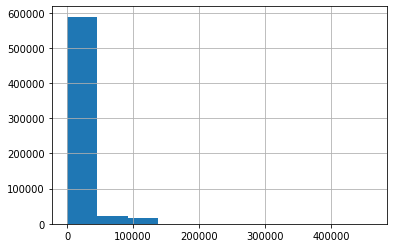

In [20]:
# Create a column for cost
df['COST'] = df.VAL_UCI + df.VAL_SH + df.VAL_SP + df.VAL_UTI + df.VAL_TOT
df.COST.hist()

In [21]:
df.COST.describe()

count    629439.000000
mean       9233.729778
std       21058.428974
min          41.480000
25%         972.580000
50%        1644.620000
75%        5609.530000
max      461127.320000
Name: COST, dtype: float64

In [22]:
# Log transform to normalize distribution
# df['COST'] = np.log1p(df['COST'])  

In [23]:
df.COST.describe()

count    629439.000000
mean       9233.729778
std       21058.428974
min          41.480000
25%         972.580000
50%        1644.620000
75%        5609.530000
max      461127.320000
Name: COST, dtype: float64

## Faixa Etaria

Mudar valores nulos para indeterminados e aplicar ordinal encoding

In [24]:
# df.faixa_etaria.fillna('sem informacao', inplace=True)
# Drop all rows from the entire DataFrame where 'faixa_etaria' is NaN
df.dropna(subset=['faixa_etaria'], inplace=True)

In [25]:
df.faixa_etaria.value_counts()

faixa_etaria
60-64a    75346
55-59a    70675
50-54a    61326
45-49a    48877
40-44a    37934
35-39a    31190
30-34a    24598
25-29a    19325
20-24a    14479
15-19a     8610
10-14a     6066
5-9a       4409
1-4a       3241
<1a        1029
Name: count, dtype: int64

In [26]:
# Create a mapping dictionary for ordinal encoding
age_mapping = {
    '<1a': 1,
    '1-4a': 2,
    '5-9a': 3,
    '10-14a': 4,
    '15-19a': 5,
    '20-24a': 6,
    '25-29a': 7,
    '30-34a': 8,
    '35-39a': 9,
    '40-44a': 10,
    '45-49a': 11,
    '50-54a': 12,
    '55-59a': 13,
    '60-64a': 14
}

# Map the 'faixa_etaria' column
df['faixa_etaria'] = df['faixa_etaria'].map(age_mapping)
df['faixa_etaria'] 

0          8
1          9
4         11
6          8
7          7
          ..
673328    13
673329     8
673336    12
673337     8
673338    14
Name: faixa_etaria, Length: 407105, dtype: int64

## EFETIVIDADE

A coluna **`DS_COBRANCA`** pode ser uma métrica útil para medir **efetividade**, especialmente em um contexto de assistência médica. Ela representa diferentes tipos de alta e resultados, que podem ser usados como proxies para o sucesso ou fracasso de um tratamento. Você pode categorizar ou agrupar esses resultados em classes mais significativas, como:

1. **Tratamento bem-sucedido** (onde o paciente melhorou ou recebeu alta em condição estável):
    - "Alta melhorado" (Discharged improved)
    - "Alta curado" (Discharged cured)
    - "Alta com previsão de retorno p/acomp do paciente" (Discharged with follow-up plan)

2. **Falha no tratamento** (onde o paciente faleceu ou teve complicações): 
    - "Óbito com DO fornecidos pelo médico assistente" 
    - "Óbito com DO fornecido pelo SVO" (Óbito com DO fornecido pelo SVO) do SVO) 
    - "Óbito com DO fornecido pelo IML"

3. **Resultados Intermediários ou Ambíguos**: 
    - "Transferência para outro estabelecimento" 
    - "Permanência por características próprias da doença" (Continuação por características da doença) 
    - "Alta a pedido" ( Alta a pedido do paciente) 
    - "Alta por evasão" (Paciente saiu sem aviso prévio) 
    - "Permanência por reoperação" (Continuação de permanência para reoperação) 
    - "Encerramento administrativo" (Encerramento administrativo)
   
4. **Resultados Administrativos ou Processuais**: 
    - "Encerramento administrativo" 
    - "Transferência para internação domiciliar" 
    - "Permanência por mudança de procedimento" (Continuação por mudança de procedimento)

### Usando isso como uma métrica:
Você pode atribuir rótulos ou pontuações a essas categorias para quantificar a **efetividade**. Por exemplo:

- **Resultados bem-sucedidos**: Pontuação 1
- **Falha (morte ou resultados críticos)**: Pontuação 0
- **Resultados ambíguos ou neutros**: Pontuação 0.5 ou ajuste com base na entrada clínica.

### Limitações:
- Alguns resultados podem precisar de contribuição clínica para determinar como devem ser classificados em termos de eficácia.
- Pode haver casos em que resultados como "transferência" ou "encerramento administrativo" não capturem totalmente o sucesso ou o fracasso do tratamento.

In [27]:
# Define a function to map discharge outcomes to effectiveness
def map_effectiveness(row):
    if row in ['Alta melhorado', 'Alta curado', 'Alta com previsão de retorno p/acomp do paciente']:
        return 'Sucesso'  # Effective treatment
    elif row in ['Óbito com DO fornecida pelo médico assistente', 'Óbito com DO fornecida pelo SVO', 'Óbito com DO fornecida pelo IML']:
        return 'Óbito'  # Ineffective (death)
    else:
        return 'Intermediário ou Indeterminado'  # Intermediate or unknown effectiveness

# Apply the function to create a new column for effectiveness
df['EFFECTIVINESS'] = df['DS_COBRANCA'].apply(map_effectiveness)

## Colunas para escolher

In [28]:
columns = [
    "EFFECTIVINESS", "COST",
    "DIAS_PERM", "faixa_etaria", 
    "DS_RACACOR", "DS_SEXO", "Treatment_Category",
    "DS_COMPLEX", "DS_DIAG_PRINC"   
]

df_processing = df[columns]

In [29]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407105 entries, 0 to 673338
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   EFFECTIVINESS       407105 non-null  object 
 1   COST                407105 non-null  float64
 2   DIAS_PERM           407105 non-null  int64  
 3   faixa_etaria        407105 non-null  int64  
 4   DS_RACACOR          407105 non-null  object 
 5   DS_SEXO             407105 non-null  object 
 6   Treatment_Category  407105 non-null  object 
 7   DS_COMPLEX          407105 non-null  object 
 8   DS_DIAG_PRINC       407105 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 31.1+ MB


In [30]:
df_processing.head()

,EFFECTIVINESS,COST,DIAS_PERM,faixa_etaria,DS_RACACOR,DS_SEXO,Treatment_Category,DS_COMPLEX,DS_DIAG_PRINC
0,Sucesso,2410.74,44,8,Parda,Feminino,DRC,Média complexidade,N18.9 Insuf renal cronica NE
1,Sucesso,161.54,1,9,Parda,Masculino,DIALITICO,Média complexidade,N18.8 Outr insuf renal cronica
4,Sucesso,975.20,3,11,Parda,Feminino,DRC,Média complexidade,N18.9 Insuf renal cronica NE
6,Sucesso,161.54,1,8,Parda,Masculino,DIALITICO,Média complexidade,N18.8 Outr insuf renal cronica
7,Intermediário ou Indeterminado,72517.32,11,7,Parda,Feminino,TRANSPLANTE,Alta complexidade,N18.0 Doenc renal em estadio final


## Data Transformation

In [31]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

categorical_columns = []

# Identify object (categorical) columns
for column in df_processing.columns:
    if df_processing[column].dtype == 'object' and column != 'EFFECTIVINESS':
        categorical_columns.append(column)

# Apply the encoder to the categorical columns
encoded_columns = encoder.fit_transform(df_processing[categorical_columns])

# Get the encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names, index=df_processing.index)

# Drop original categorical columns and concatenate with the encoded DataFrame
df_processing = pd.concat([df_processing.drop(columns=categorical_columns), encoded_df], axis=1)

df_processing

,EFFECTIVINESS,COST,DIAS_PERM,faixa_etaria,DS_RACACOR_Branca,DS_RACACOR_Indígena,DS_RACACOR_Parda,DS_RACACOR_Preta,DS_RACACOR_Sem Informação,DS_SEXO_Masculino,Treatment_Category_DIALITICO,Treatment_Category_DRC,Treatment_Category_TRANSPLANTE,DS_COMPLEX_Média complexidade,DS_DIAG_PRINC_N18.0 Doenc renal em estadio final,DS_DIAG_PRINC_N18.8 Outr insuf renal cronica,DS_DIAG_PRINC_N18.9 Insuf renal cronica NE
0,Sucesso,2410.74,44,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Sucesso,161.54,1,9,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Sucesso,975.20,3,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,Sucesso,161.54,1,8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,Intermediário ou Indeterminado,72517.32,11,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673328,Sucesso,12642.44,33,13,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673329,Sucesso,899.30,1,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673336,Óbito,2852.38,3,12,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673337,Intermediário ou Indeterminado,947.70,3,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
df_processing = df_processing[df['EFFECTIVINESS'] != 'Intermediário ou Indeterminado']
df_processing

,EFFECTIVINESS,COST,DIAS_PERM,faixa_etaria,DS_RACACOR_Branca,DS_RACACOR_Indígena,DS_RACACOR_Parda,DS_RACACOR_Preta,DS_RACACOR_Sem Informação,DS_SEXO_Masculino,Treatment_Category_DIALITICO,Treatment_Category_DRC,Treatment_Category_TRANSPLANTE,DS_COMPLEX_Média complexidade,DS_DIAG_PRINC_N18.0 Doenc renal em estadio final,DS_DIAG_PRINC_N18.8 Outr insuf renal cronica,DS_DIAG_PRINC_N18.9 Insuf renal cronica NE
0,Sucesso,2410.74,44,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Sucesso,161.54,1,9,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Sucesso,975.20,3,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,Sucesso,161.54,1,8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,Sucesso,932.86,3,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673324,Sucesso,1381.70,9,13,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673326,Óbito,9246.54,2,14,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
673328,Sucesso,12642.44,33,13,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673329,Sucesso,899.30,1,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Escalonamento

In [33]:
# Import RobustScaler from sklearn
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Assuming df is your DataFrame and it contains the columns 'COST', 'DIAS_PERM', 'faixa_etaria'

# Step 1: Initialize the RobustScaler
scaler = RobustScaler()

# Step 2: Select the columns to scale
columns_to_scale = ['COST', 'DIAS_PERM', 'faixa_etaria']

# Step 3: Fit and transform the selected columns using RobustScaler
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled dataframe
print("Scaled DataFrame:")
print(df.head())

Scaled DataFrame:
           N_AIH  ANO_CMPT  MES_CMPT          TP_CBO TP_CNAE    TP_ESPEC  \
0  1215100025304      2015         1  NÃ£o Informado     NaN    ClÃ­nico   
1  1215100029650      2015         1  NÃ£o Informado     NaN    ClÃ­nico   
4  1215100032487      2015         1  NÃ£o Informado     NaN    ClÃ­nico   
6  1215100028208      2015         1  NÃ£o Informado     NaN    ClÃ­nico   
7  1214100568263      2015         1  NÃ£o Informado     NaN  CirÃºrgico   

  TP_NACIONAL  faixa_etaria    dt_inter    dt_saida  ...  VAL_SADTSR  \
0      Brasil         -1.00  2014-12-06  2015-01-19  ...         0.0   
1      Brasil         -0.75  2015-01-13  2015-01-14  ...         0.0   
4      Brasil         -0.25  2015-01-26  2015-01-29  ...         0.0   
6      Brasil         -1.00  2015-01-14  2015-01-15  ...         0.0   
7      Brasil         -1.25  2014-11-14  2014-11-25  ...         0.0   

   VAL_TRANSP VAL_OBSANG VAL_PED1AC VAL_UTI   VAL_TOT    US_TOT  \
0         0.0        0.0 

## Seleção de Features e Target

In [34]:
X = df_processing.drop(columns=['EFFECTIVINESS'])
y = df_processing['EFFECTIVINESS']

In [35]:
X

,COST,DIAS_PERM,faixa_etaria,DS_RACACOR_Branca,DS_RACACOR_Indígena,DS_RACACOR_Parda,DS_RACACOR_Preta,DS_RACACOR_Sem Informação,DS_SEXO_Masculino,Treatment_Category_DIALITICO,Treatment_Category_DRC,Treatment_Category_TRANSPLANTE,DS_COMPLEX_Média complexidade,DS_DIAG_PRINC_N18.0 Doenc renal em estadio final,DS_DIAG_PRINC_N18.8 Outr insuf renal cronica,DS_DIAG_PRINC_N18.9 Insuf renal cronica NE
0,2410.74,44,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,161.54,1,9,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,975.20,3,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,161.54,1,8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,932.86,3,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673324,1381.70,9,13,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673326,9246.54,2,14,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
673328,12642.44,33,13,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
673329,899.30,1,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [36]:
y.value_counts()

EFFECTIVINESS
Sucesso    308711
Óbito       28003
Name: count, dtype: int64

In [37]:
# Import necessary libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Display the initial class distribution
print("Initial Class Distribution:")
print(Counter(y))

# Step 1: Undersample the Majority Class ('Sucesso') Using RandomUnderSampler
# Define sampling strategy explicitly for multi-class
sampling_strategy_undersample = {
    'Sucesso': 100000,  # Reduce 'Sucesso' to 134,684 samples
    'Óbito': 28003  # Keep it as is
}

under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_undersample, random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

# Display the class distribution after undersampling
print("Class distribution after undersampling:")
print(Counter(y_under))

# Step 2: Oversample the Minority Classes Using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_under, y_under)

# Display the new class distributions after oversampling
print("Class distributions after undersampling and oversampling:")
print(Counter(y_balanced))

# Checking the balanced dataset value counts
y_balanced_value_counts = pd.Series(y_balanced).value_counts()
print("\nClass distribution after balancing:")
print(y_balanced_value_counts)

Initial Class Distribution:
Counter({'Sucesso': 308711, 'Óbito': 28003})
Class distribution after undersampling:
Counter({'Sucesso': 100000, 'Óbito': 28003})
Class distributions after undersampling and oversampling:
Counter({'Sucesso': 100000, 'Óbito': 100000})

Class distribution after balancing:
EFFECTIVINESS
Sucesso    100000
Óbito      100000
Name: count, dtype: int64


In [38]:
X = X_balanced
y = y_balanced

# Treinamento

In [39]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd

# Assuming X and y are already defined (X as features, y as the target class)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to accumulate metrics across folds
total_avg_precision = []
total_avg_recall = []
total_avg_f1 = []

# Initialize dictionaries to accumulate class-specific metrics
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Perform Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate overall precision, recall, and F1-score using 'macro' averaging
    total_avg_precision.append(precision_score(y_test, y_pred, average='macro'))
    total_avg_recall.append(recall_score(y_test, y_pred, average='macro'))
    total_avg_f1.append(f1_score(y_test, y_pred, average='macro'))

    # Get the unique labels from the target
    labels = np.unique(y_test)

    # Calculate precision, recall, and F1-score for each class
    for label in labels:
        if label not in precision_dict:
            precision_dict[label] = []
            recall_dict[label] = []
            f1_dict[label] = []
        
        precision_dict[label].append(precision_score(y_test, y_pred, average=None, labels=[label])[0])
        recall_dict[label].append(recall_score(y_test, y_pred, average=None, labels=[label])[0])
        f1_dict[label].append(f1_score(y_test, y_pred, average=None, labels=[label])[0])

# After all folds are done, calculate the average of the total metrics across folds
avg_precision = np.mean(total_avg_precision)
avg_recall = np.mean(total_avg_recall)
avg_f1 = np.mean(total_avg_f1)

# Print the total precision, recall, and F1-score
print('Total Averages across all folds:')
print(f'  Average Precision: {avg_precision}')
print(f'  Average Recall: {avg_recall}')
print(f'  Average F1-score: {avg_f1}')
print("\n\n\n\n\n\n")

# Print the precision, recall, and F1-score for each class
for label in precision_dict.keys():
    avg_precision = np.mean(precision_dict[label])
    avg_recall = np.mean(recall_dict[label])
    avg_f1 = np.mean(f1_dict[label])
    print(f'Class: {label}')
    print(f'  Average Precision: {avg_precision}')
    print(f'  Average Recall: {avg_recall}')
    print(f'  Average F1-score: {avg_f1}')
    print()

Total Averages across all folds:
  Average Precision: 0.8603390005924926
  Average Recall: 0.859295
  Average F1-score: 0.8591929698066096







Class: Sucesso
  Average Precision: 0.8410073677442427
  Average Recall: 0.88612
  Average F1-score: 0.8629707873616692

Class: Óbito
  Average Precision: 0.8796706334407425
  Average Recall: 0.83247
  Average F1-score: 0.8554151522515501



# Explicabilidade

Feature Importances:
COST                                                0.314779
DIAS_PERM                                           0.159789
Treatment_Category_DRC                              0.074285
DS_RACACOR_Branca                                   0.064044
faixa_etaria                                        0.059266
DS_SEXO_Masculino                                   0.058934
DS_DIAG_PRINC_N18.9 Insuf renal cronica NE          0.052613
DS_DIAG_PRINC_N18.0 Doenc renal em estadio final    0.047805
DS_RACACOR_Parda                                    0.044765
DS_RACACOR_Sem Informação                           0.038058
Treatment_Category_DIALITICO                        0.031204
DS_DIAG_PRINC_N18.8 Outr insuf renal cronica        0.019136
DS_RACACOR_Preta                                    0.013752
DS_COMPLEX_Média complexidade                       0.010824
Treatment_Category_TRANSPLANTE                      0.010227
DS_RACACOR_Indígena                                 0.000518
dty

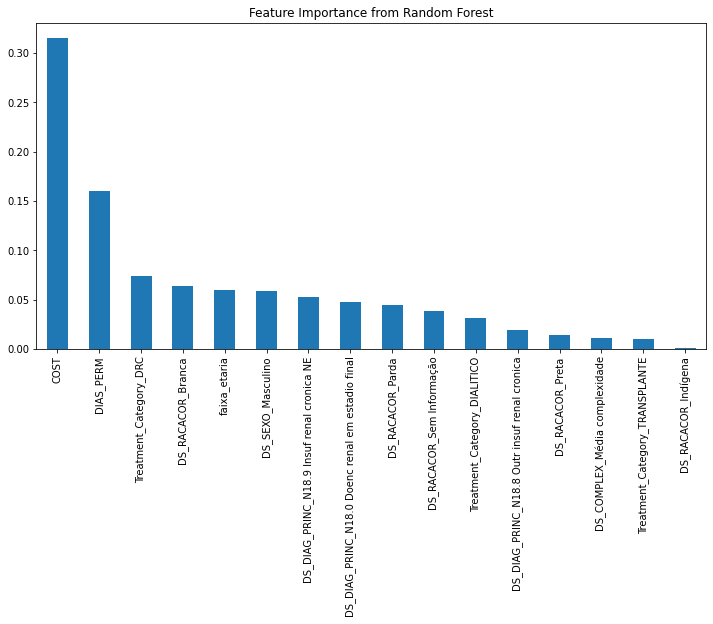

In [40]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

# Optional: Plotting the feature importances
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance from Random Forest')
plt.show()

# Visualização das Árvores

Apenas uma por ter usado o random florest

In [41]:
pip install graphviz pydotplus

Note: you may need to restart the kernel to use updated packages.


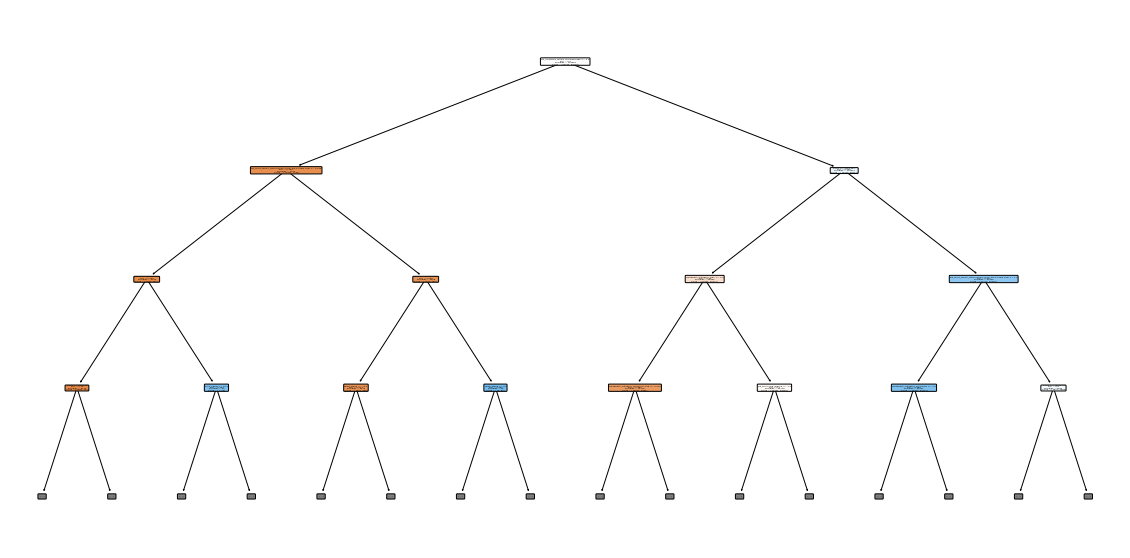

InvocationException: GraphViz's executables not found

In [42]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

# Assuming model is the RandomForestClassifier and it's already been trained
# Extract a single tree from the trained Random Forest
single_tree = model.estimators_[0]  # Access the first tree in the forest

# Method 1: Visualizing Using Matplotlib's plot_tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.show()

# Method 2: Exporting Using export_graphviz and Visualizing with Graphviz
dot_data = export_graphviz(single_tree, out_file=None,
                           feature_names=X.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Convert to a high DPI image using pydotplus with a higher DPI setting
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graph_defaults(dpi=600)  # Set high DPI for better resolution

# Create PNG with higher DPI and display
png_image = graph.create_png()
Image(png_image)